In [16]:
import requests
from bs4 import BeautifulSoup
import json

name = input()

def get_stock_code(name):
    url = f"https://ac.finance.naver.com/ac?_callback=window.__jindo2_callback._$3361_0&q={name}&q_enc=euc-kr&st=111&frm=stock&r_format=json&r_enc=euc-kr&r_unicode=0&t_koreng=1&r_lt=111"
    response = requests.get(url).text
    soup = json.loads(response[response.find('{'):response.rfind('}')+1])
    items = soup['items']
    code = items[0][0][0][0]
    return code
s_code = get_stock_code(name)

In [2]:
def stock_summary(name):
    url=f"https://finance.naver.com/item/main.naver?code={s_code}"
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36"}
    res=requests.get(url,headers=headers)
    soup=BeautifulSoup(res.text,"lxml")
    
    print(f"########## {name} 요약 정보 ##########")
    print()
    # 시가총액
    stock_mc = soup.select_one('#_market_sum').text.strip()
    stock_mc = stock_mc.replace('\t', '').replace('\n', '').replace(',', '')
    print(f"\033[31m\033[91m시가총액\033[0m은 \033[31m\033[93m{stock_mc}억 원\033[0m입니다.")

    # 시가총액 순위
    stock_mc_rank = soup.select_one('.first tr:nth-child(3) td').text
    print(f"\033[31m\033[91m시가총액 순위\033[0m는 \033[31m\033[93m{stock_mc_rank}\033[0m입니다.")

    # 상장주식수
    stock_qs = soup.select_one('.first tr:nth-child(4) em').text
    print(f"\033[31m\033[91m상장주식수\033[0m는 \033[31m\033[93m{stock_qs}\033[0m입니다.")

    # 액면가
    stock_face_value = soup.select_one('#tab_con1 tr:nth-child(5) em:nth-child(1)').text
    print(f"\033[31m\033[91m액면가\033[0m는 \033[31m\033[93m{stock_face_value}원\033[0m입니다.")

    # 외국인한도주식수(A)
    stock_foreign_A = soup.select_one('.lwidth tr:nth-child(2) em').text
    print(f"\033[31m\033[91m외국인한도주식수(A)\033[0m는 \033[31m\033[93m{stock_foreign_A}주\033[0m 입니다.")

    # 외국인한도주식수(B)
    stock_foreign_B = soup.select_one('.lwidth tr:nth-child(3) em').text
    print(f"\033[31m\033[91m외국인한도주식수(B)\033[0m는 \033[31m\033[93m{stock_foreign_B}주\033[0m 입니다.")

    # 외국인소진율(B/A)
    stock_foreign_er = soup.select_one('.lwidth tr:nth-child(4) em').text
    print(f"\033[31m\033[91m외국인소진율(B/A)\033[0m는 \033[31m\033[93m{stock_foreign_er}\033[0m 입니다.")

    # 투자의견
    try:
        stock_io = soup.select_one('#tab_con1 .f_up').text
        print(f"\033[31m\033[91m투자의견\033[0m은 \033[31m\033[93m{stock_io} 의견\033[0m입니다.")
    except:
        print("\033[31m\033[91m투자의견\033[0m이 없습니다.")

    # 목표주가
    try:
        stock_tp = soup.select_one('.rwidth tr:nth-child(2) em:nth-child(3)').text
        print(f"\033[31m\033[91m목표주가\033[0m는 \033[31m\033[93m{stock_tp}원\033[0m 입니다.")
    except:
        print("\033[31m\033[91m목표주가\033[0m가 없습니다.")

    # 52주 최고가
    stock_52_high = soup.select_one('.rwidth tr:nth-child(3) em').text
    print(f"\033[31m\033[91m52주 최고가\033[0m는 \033[31m\033[93m{stock_52_high}원\033[0m 입니다.")

    # 52주 최저가
    stock_52_row = soup.select_one('.rwidth tr:nth-child(3) em:nth-child(3)').text
    print(f"\033[31m\033[91m52주 최저가\033[0m는 \033[31m\033[93m{stock_52_row}원\033[0m 입니다.")

    # PER / EPS
    stock_per = soup.select_one('#_per').text
    stock_eps = soup.select_one('#_eps').text
    print(f"\033[31m\033[91mPER\033[0m은 \033[31m\033[93m{stock_per}배이고 \033[31m\033[91mEPS\033[0m는 \033[31m\033[93m{stock_eps}원\033[0m 입니다.")

    # 추정 PER / 추정 EPS
    try:
        stock_cns_per = soup.select_one('#_cns_per').text
        stock_cns_eps = soup.select_one('#_cns_eps').text
        print(f"\033[31m\033[91m추정 PER\033[0m은 \033[31m\033[93m{stock_cns_per}배\033[0m이고 \033[31m\033[91m추정 EPS\033[0m는 \033[31m\033[93m{stock_cns_eps}원\033[0m 입니다.")
    except:
        print("\033[31m\033[91m추정치가 없습니다.")
    # PBR / BPS
    stock_pbr = soup.select_one('#_pbr').text
    stock_bps = soup.select_one('.per_table tr:nth-child(4) em:nth-child(3)').text
    print(f"\033[31m\033[91mPBR\033[0m은 \033[31m\033[93m{stock_pbr}배이고 \033[31m\033[91mBPS\033[0m는 \033[31m\033[93m{stock_bps}원\033[0m 입니다.")

    # 배당수익률
    try:
        stock_dir = soup.select_one('#_dvr').text
        print(f"\033[31m\033[91m배당수익률\033[0m은 \033[31m\033[93m{stock_dir}%\033[0m 입니다.")
    except:
        print("\033[31m\033[91m배당수익률\033[0m이 없습니다.")
    # 동일업종 PER
    stock_si_per = soup.select_one('.gray .strong:nth-child(2) em').text
    print(f"\033[31m\033[91m동일업종 PER\033[0m은 \033[31m\033[93m{stock_si_per}배\033[0m 입니다.")

    # 동일업종 등락률
    try:
        stock_sifr = soup.select_one('.gray .f_up em').text.strip()
        print(f"\033[31m\033[91m동일업종 등락률\033[0m은 \033[31m\033[93m{stock_sifr}\033[0m 입니다.")
    except:
        print("\033[31m\033[91m동일업종 등락률\033[0m이 없습니다.")

    print()
    print("#"*42)

stock_summary(name)


########## 삼성전자 요약 정보 ##########

시가총액은 364조7537억 원입니다.
시가총액 순위는 코스피 1위입니다.
상장주식수는 5,969,782,550입니다.
액면가는 100원입니다.
외국인한도주식수(A)는 5,969,782,550주 입니다.
외국인한도주식수(B)는 3,028,614,032주 입니다.
외국인소진율(B/A)는 50.73% 입니다.
투자의견은 4.00매수 의견입니다.
목표주가는 77,950원 입니다.
52주 최고가는 71,200원 입니다.
52주 최저가는 51,800원 입니다.
PER은 7.58배이고 EPS는 8,057원 입니다.
추정 PER은 31.00배이고 추정 EPS는 1,961원 입니다.
PBR은 1.20배이고 BPS는 50,817원 입니다.
배당수익률은 2.36% 입니다.
동일업종 PER은 8.96배 입니다.
동일업종 등락률은 +1.61% 입니다.

##########################################


In [3]:
def stock_news(name):
    url=f"https://finance.naver.com/item/main.naver?code={s_code}"
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36"}
    res=requests.get(url,headers=headers)
    soup=BeautifulSoup(res.text,"lxml")

    print()
    print(f"\033[31m\033[91m{name}\033[0m의 \033[31m\033[93m최신 뉴스\033[0m에 대해 알려드리겠습니다. \n")
    news_list = []
    index = 1
    for i in range(1,10):
        try:
            news_list=soup.select_one(f".news_section ul:nth-child(2) li:nth-child({i}) a:nth-child(1)")
            print(index,".", news_list.get_text())
            print("https://finance.naver.com"+ news_list.get("href"))
            print()
            index += 1
        except:
            pass

stock_news(name)


삼성전자의 최신 뉴스에 대해 알려드리겠습니다. 

1 . “평균 연봉 1억5000만원”…SK이노베이션, 삼성전...
https://finance.naver.com/item/news_read.naver?article_id=0000042149&office_id=243&code=005930&sm=title_entity_id.basic

2 . 삼성, 85주년 창립기념일…파티 대...
https://finance.naver.com/item/news_read.naver?article_id=0004985495&office_id=014&code=005930&sm=title_entity_id.basic

3 . 최악 피했지만… 삼성·SK "장비수...
https://finance.naver.com/item/news_read.naver?article_id=0004985471&office_id=014&code=005930&sm=title_entity_id.basic

4 . 美, 對中 반도체장비 추가규제 예고…삼성·SK '산...
https://finance.naver.com/item/news_read.naver?article_id=0004985469&office_id=014&code=005930&sm=title_entity_id.basic

5 . 삼성 中공장 웨이퍼 투입 108% 늘...
https://finance.naver.com/item/news_read.naver?article_id=0004823886&office_id=015&code=005930&sm=title_entity_id.basic



In [4]:
def stock_event_discussion(name):
    url=f"https://finance.naver.com/item/main.naver?code={s_code}"
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36"}
    res=requests.get(url,headers=headers)
    soup=BeautifulSoup(res.text,"lxml")

    print(f"\033[31m\033[91m{name}\033[0m의 \033[31m\033[93m종목 토론방 게시글\033[0m입니다.")
    print()
    news_list = []
    index = 1
    for i in range(1,10):
        try:
            news_list=soup.select_one(f".right ul:nth-child(2) li:nth-child({i}) a")
            print(index,".", news_list.get_text().strip())
            print("https://finance.naver.com"+ news_list.get("href"))
            index += 1
            print()
        except:
            pass

stock_event_discussion(name)

삼성전자의 종목 토론방 게시글입니다.

1 . 주식빛 개인회생 가능한가요?
https://finance.naver.com/item/board_read.naver?code=005930&nid=243660465

2 . *따불당은 희한해??
https://finance.naver.com/item/board_read.naver?code=005930&nid=243660439

3 . 윤완용 콜걸스승 천공 뭐라고 씨부리노
https://finance.naver.com/item/board_read.naver?code=005930&nid=243660435

4 . 선동하는 4050 좌파들아
https://finance.naver.com/item/board_read.naver?code=005930&nid=243660414

5 . 윤완용,검새,국짐,탄핵타령 = 조선족
https://finance.naver.com/item/board_read.naver?code=005930&nid=243660413



In [14]:
# 기업 연간 재무제표 출력
import pandas as pd
import requests
def stock_annual_fi(name):
    url=f"https://finance.naver.com/item/main.naver?code={s_code}"
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36"}
    res=requests.get(url,headers=headers)
    df = pd.read_html(res.text)[3]

    df.set_index(df.columns[0], inplace = True)
    df.index.rename('주요재무정보', inplace = True)
    df.columns = df.columns.droplevel(2)
    annual_date = pd.DataFrame(df).xs('최근 연간 실적', axis = 1)
    print(f"\033[31m\033[91m{name}\033[0m의 \033[31m\033[93m최근 연간 실적\033[0m에 대해 알려드리겠습니다.")
    display(annual_date)

stock_annual_fi(name)

레인보우로보틱스의 최근 연간 실적에 대해 알려드리겠습니다.


,2020.12,2021.12,2022.12,2023.12(E)
주요재무정보,,,,
매출액,54,90,136.00,230
영업이익,-13,-10,13.00,50
당기순이익,-14,-78,58.00,50
영업이익률,-24.85,-11.49,9.55,21.74
순이익률,-25.92,-87.46,42.41,21.74
ROE(지배주주),-19.27,-28.81,10.56,NaN
부채비율,72.91,33.35,23.82,NaN
당좌비율,124.00,3727.21,1789.06,NaN
유보율,-33.98,450.64,602.36,NaN


In [17]:
import pandas as pd
import requests
def stock_quarter_fi(name):
    url=f"https://finance.naver.com/item/main.naver?code={s_code}"
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36"}
    res=requests.get(url,headers=headers)
    df = pd.read_html(res.text)[3]

    df.set_index(df.columns[0], inplace = True)
    df.index.rename('주요재무정보', inplace = True)
    df.columns = df.columns.droplevel(2)
    quarter_date = pd.DataFrame(df).xs('최근 분기 실적', axis = 1)
    print(f"\033[31m\033[91m{name}\033[0m의 \033[31m\033[93m최근 분기 실적\033[0m에 대해 알려드리겠습니다.")
    display(quarter_date)

stock_quarter_fi(name)

삼성바이오로직스의 최근 분기 실적에 대해 알려드리겠습니다.


,2021.12,2022.03,2022.06,2022.09,2022.12,2023.03(E)
주요재무정보,,,,,,
매출액,4443.00,5113.00,6514.00,8730.00,9655.00,8134.00
영업이익,1288.00,1764.00,1697.00,3247.00,3128.00,2413.00
당기순이익,793.00,1469.00,1520.00,1292.00,3699.00,2179.00
영업이익률,29.00,34.50,26.05,37.20,32.40,29.67
순이익률,17.85,28.74,23.34,14.79,38.31,26.79
ROE(지배주주),8.21,10.68,7.69,7.51,11.42,NaN
부채비율,59.68,85.07,84.67,86.88,84.56,NaN
당좌비율,80.95,65.13,63.50,68.91,93.17,NaN
유보율,2922.69,2518.30,4670.04,4742.63,4950.52,NaN


In [7]:
# 오늘 주요 시세
import requests
import pandas as pd

def stock_major_price(name):
    url=f"https://finance.naver.com/item/sise.naver?code={s_code}"
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36"}
    res=requests.get(url,headers=headers)

    df = pd.read_html(res.text, encoding = 'euc-kr')[1]
    df = df.dropna()
    
    print(f"\033[31m\033[91m{name}\033[0m의 \033[31m\033[93m주요 시세\033[0m에 대해 알려드리겠습니다.")
    display(df)

stock_major_price(name)

삼성전자의 주요 시세에 대해 알려드리겠습니다.


,0,1,2,3
0,현재가,61100,매도호가,61200
1,전일대비,상승 800,매수호가,61100
2,등락률(%),+1.33%,전일가,60300
3,거래량,8951319,시가,61000
4,거래대금(백만),545123,고가,61200
5,액면가,100원,저가,60500
7,상한가,78300,전일상한,78200
8,하한가,42300,전일하한,42200
9,PER,7.58,EPS,8057
10,52주 최고,71200,52주 최저,51800


In [8]:
import requests
import pandas as pd
def stock_public_an(name):
    url=f"https://dart.fss.or.kr/dsab001/search.ax?textCrpNM={s_code}"
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36"}
    res = requests.get(url, headers = headers)
    df = pd.read_html(res.text, encoding = 'euc-kr')[0]
    df = df.style.hide(axis = 'index')
    print(f"\033[31m\033[91m{name}\033[0m의 \033[31m\033[93m공시 내용\033[0m에 대해 알려드리겠습니다.")
    display(df)

stock_public_an(name)

삼성전자의 공시 내용에 대해 알려드리겠습니다.


번호,공시대상회사,보고서명,제출인,접수일자,비고
1,유 삼성전자,임원ㆍ주요주주특정증권등소유상황보고서,안재용,2023.03.16,nan
2,유 삼성전자,정기주주총회결과,삼성전자,2023.03.15,유
3,유 삼성전자,사업보고서 (2022.12),삼성전자,2023.03.07,연
4,유 삼성전자,최대주주등소유주식변동신고서,삼성전자,2023.03.06,유
5,유 삼성전자,임원ㆍ주요주주특정증권등소유상황보고서,안재용,2023.03.02,nan
6,유 삼성전자,대규모기업집단현황공시[분기별공시(대표회사용)],삼성전자,2023.02.28,공
7,유 삼성전자,임원ㆍ주요주주특정증권등소유상황보고서,오용찬,2023.02.21,nan
8,유 삼성전자,주식등의대량보유상황보고서(일반),삼성물산,2023.02.17,nan
9,유 삼성전자,감사보고서제출,삼성전자,2023.02.16,유
10,유 삼성전자,특수관계인과의보험거래,삼성전자,2023.02.14,공


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from matplotlib import dates as mdates
from bs4 import BeautifulSoup as bs
def stock_market_price(name):
    df = pd.DataFrame()
    for page in range(1, 20):
        url = f"https://finance.naver.com/item/sise_day.nhn?code={s_code}&page={page}"
        headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}
        response = requests.get(url, headers=headers)
        html = bs(response.text, 'html.parser')
        html_table = html.select("table")
        table = pd.read_html(str(html_table))
        df = pd.concat([df,table[0].dropna()])
        
    print(f"\033[31m\033[91m{name}\033[0m의 \033[31m\033[93m일별 시세\033[0m에 대해 알려드리겠습니다.")
    display(df)
stock_market_price(name)

삼성전자의 일별 시세에 대해 알려드리겠습니다.


,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.03.22,61100.0,800.0,61000.0,61200.0,60500.0,8951319.0
2,2023.03.21,60300.0,100.0,60500.0,60700.0,60100.0,8318514.0
3,2023.03.20,60200.0,1100.0,61100.0,61200.0,60200.0,9618009.0
4,2023.03.17,61300.0,1400.0,60800.0,61300.0,60600.0,14090110.0
5,2023.03.16,59900.0,100.0,59200.0,60200.0,59100.0,10611939.0
...,...,...,...,...,...,...,...
9,2022.06.23,57400.0,200.0,57700.0,58000.0,56800.0,28338608.0
10,2022.06.22,57600.0,900.0,59000.0,59100.0,57600.0,23334687.0
11,2022.06.21,58500.0,200.0,58700.0,59200.0,58200.0,25148109.0
12,2022.06.20,58700.0,1100.0,59800.0,59900.0,58100.0,34111306.0


삼성바이오로직스의 일일 차트입니다.


<function matplotlib.pyplot.show(close=None, block=None)>

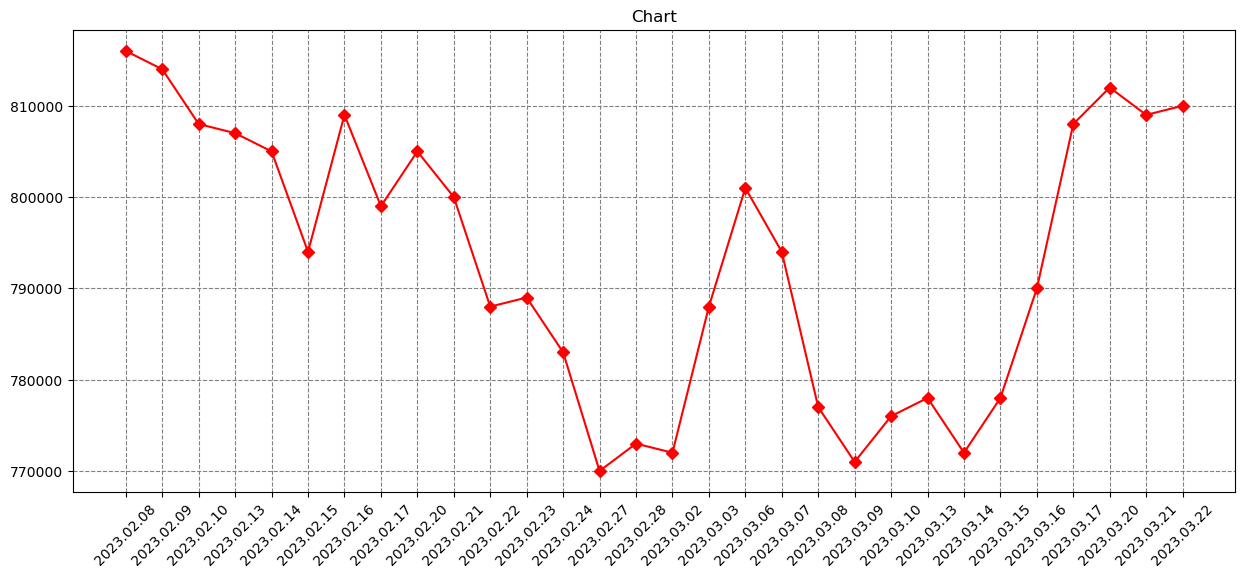

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from matplotlib import dates as mdates
from bs4 import BeautifulSoup as bs

def stock_chart(name):
    df = pd.DataFrame()
    for page in range(1, 20):
        url = f"https://finance.naver.com/item/sise_day.nhn?code={s_code}&page={page}"
        headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}
        response = requests.get(url, headers=headers)
        html = bs(response.text, 'html.parser')
        html_table = html.select("table")
        table = pd.read_html(str(html_table))
        df = pd.concat([df,table[0].dropna()])
        df = df.iloc[0:30]
        df = df.sort_values(by='날짜')

    plt.figure(figsize=(15, 6))
    plt.title('Chart')
    plt.xticks(rotation=45)
    plt.plot(df['날짜'], df['종가'], color = 'red', linestyle = '-', marker = 'D')
    plt.grid(color = 'gray', linestyle='--')
    print(f"\033[31m\033[91m{name}\033[0m의 \033[31m\033[93m일일 차트\033[0m입니다.")
    display(plt.show)
stock_chart(name)

검색하고 싶은 종목명을 검색하세요.

현대차의 종목코드는  005380입니다. 

알고 싶은 정보를 검색하세요.

#####################################################################################

요약 | 뉴스 | 토론 | 연간 실적 | 분기 실적 | 주요 시세 | 공시 | 일별 시세 | 차트 | 종료

#####################################################################################

########## 현대차 요약 정보 ##########

시가총액은 38조1391억 원입니다.
시가총액 순위는 코스피 8위입니다.
상장주식수는 211,531,506입니다.
액면가는 5,000원입니다.
외국인한도주식수(A)는 211,531,506주 입니다.
외국인한도주식수(B)는 64,376,188주 입니다.
외국인소진율(B/A)는 30.43% 입니다.
투자의견은 4.05매수 의견입니다.
목표주가는 238,158원 입니다.
52주 최고가는 203,500원 입니다.
52주 최저가는 150,500원 입니다.
PER은 6.78배이고 EPS는 26,592원 입니다.
추정 PER은 6.00배이고 추정 EPS는 30,552원 입니다.
PBR은 0.57배이고 BPS는 315,142원 입니다.
배당수익률은 3.88% 입니다.
동일업종 PER은 7.56배 입니다.
동일업종 등락률은 +1.97% 입니다.

##########################################
알고 싶은 정보를 검색하세요.

#####################################################################################

요약 | 뉴스 | 토론 | 연간 실적 | 분기 실적 | 주요 시세 | 공시 | 일별 시세 | 차트 | 종료

#############################################

,2020.12,2021.12,2022.12,2023.12(E)
주요재무정보,,,,
매출액,1039976.00,1176106.00,1425275.00,1482659.00
영업이익,23947.00,66789.00,98198.00,101919.00
당기순이익,19246.00,56931.00,79836.00,91260.00
영업이익률,2.30,5.68,6.89,6.87
순이익률,1.85,4.84,5.60,6.16
ROE(지배주주),2.04,6.84,9.36,9.68
부채비율,174.22,183.17,181.36,NaN
당좌비율,44.87,45.68,51.97,NaN
유보율,4909.48,5187.27,5654.49,NaN


알고 싶은 정보를 검색하세요.

#####################################################################################

요약 | 뉴스 | 토론 | 연간 실적 | 분기 실적 | 주요 시세 | 공시 | 일별 시세 | 차트 | 종료

#####################################################################################

현대차의 주요 시세에 대해 알려드리겠습니다.


,0,1,2,3
0,현재가,180300,매도호가,180300
1,전일대비,"상승 4,500",매수호가,180200
2,등락률(%),+2.56%,전일가,175800
3,거래량,716762,시가,177000
4,거래대금(백만),128290,고가,180500
5,액면가,"5,000원",저가,176700
7,상한가,228500,전일상한,227500
8,하한가,123100,전일하한,122600
9,PER,6.78,EPS,26592
10,52주 최고,203500,52주 최저,150500


알고 싶은 정보를 검색하세요.

#####################################################################################

요약 | 뉴스 | 토론 | 연간 실적 | 분기 실적 | 주요 시세 | 공시 | 일별 시세 | 차트 | 종료

#####################################################################################

현대차의 공시 내용에 대해 알려드리겠습니다.


번호,공시대상회사,보고서명,제출인,접수일자,비고
1,유 현대자동차,임원ㆍ주요주주특정증권등소유상황보고서,김진우,2023.03.17,nan
2,유 현대자동차,특수관계인으로부터기타유가증권매수,현대자동차,2023.03.16,공
3,유 현대자동차,사업보고서 (2022.12),현대자동차,2023.03.15,연
4,유 현대자동차,풍문또는보도에대한해명(미확정),현대자동차,2023.03.10,유
5,유 현대자동차,감사보고서제출,현대자동차,2023.03.08,유
6,유 현대자동차,특수관계인으로부터기타유가증권매수,현대자동차,2023.03.08,공
7,유 현대자동차,특수관계인으로부터기타유가증권매수,현대자동차,2023.03.07,공
8,유 현대자동차,특수관계인으로부터기타유가증권매수,현대자동차,2023.03.06,공
9,유 현대자동차,자기주식처분결과보고서,현대자동차,2023.03.03,nan
10,유 현대자동차,영업(잠정)실적(공정공시),현대자동차,2023.03.02,유


알고 싶은 정보를 검색하세요.

#####################################################################################

요약 | 뉴스 | 토론 | 연간 실적 | 분기 실적 | 주요 시세 | 공시 | 일별 시세 | 차트 | 종료

#####################################################################################

현대차의 일일 차트입니다.


<function matplotlib.pyplot.show(close=None, block=None)>

알고 싶은 정보를 검색하세요.

#####################################################################################

요약 | 뉴스 | 토론 | 연간 실적 | 분기 실적 | 주요 시세 | 공시 | 일별 시세 | 차트 | 종료

#####################################################################################

현대차의 일일 차트입니다.


<function matplotlib.pyplot.show(close=None, block=None)>

알고 싶은 정보를 검색하세요.

#####################################################################################

요약 | 뉴스 | 토론 | 연간 실적 | 분기 실적 | 주요 시세 | 공시 | 일별 시세 | 차트 | 종료

#####################################################################################

현대차의 일일 차트입니다.


<function matplotlib.pyplot.show(close=None, block=None)>

알고 싶은 정보를 검색하세요.

#####################################################################################

요약 | 뉴스 | 토론 | 연간 실적 | 분기 실적 | 주요 시세 | 공시 | 일별 시세 | 차트 | 종료

#####################################################################################

종료하겠습니다.


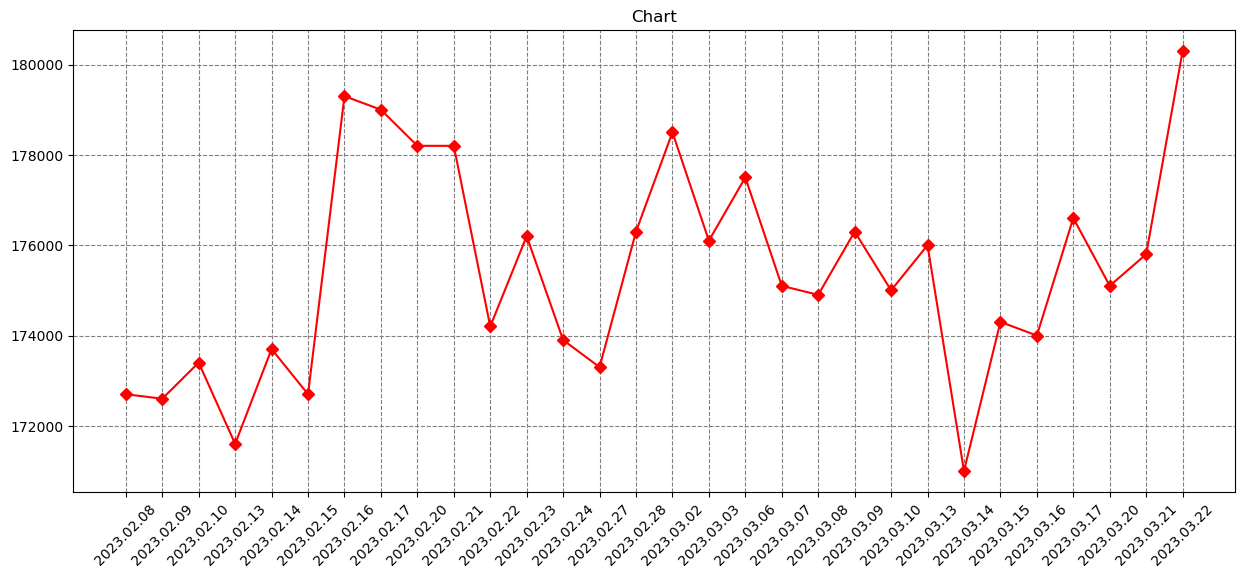

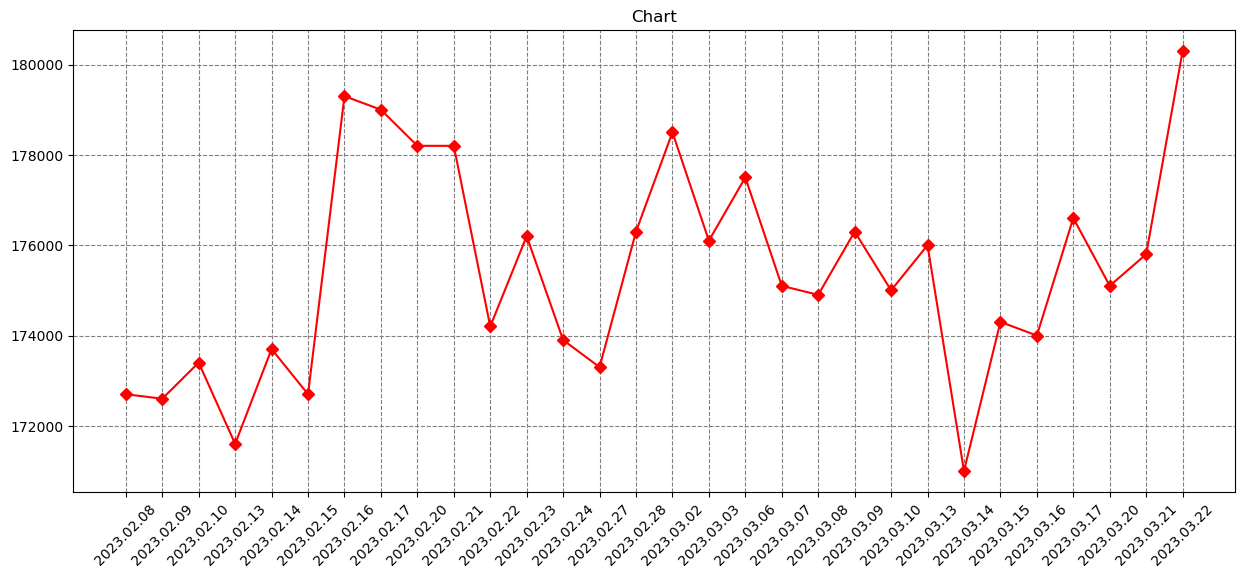

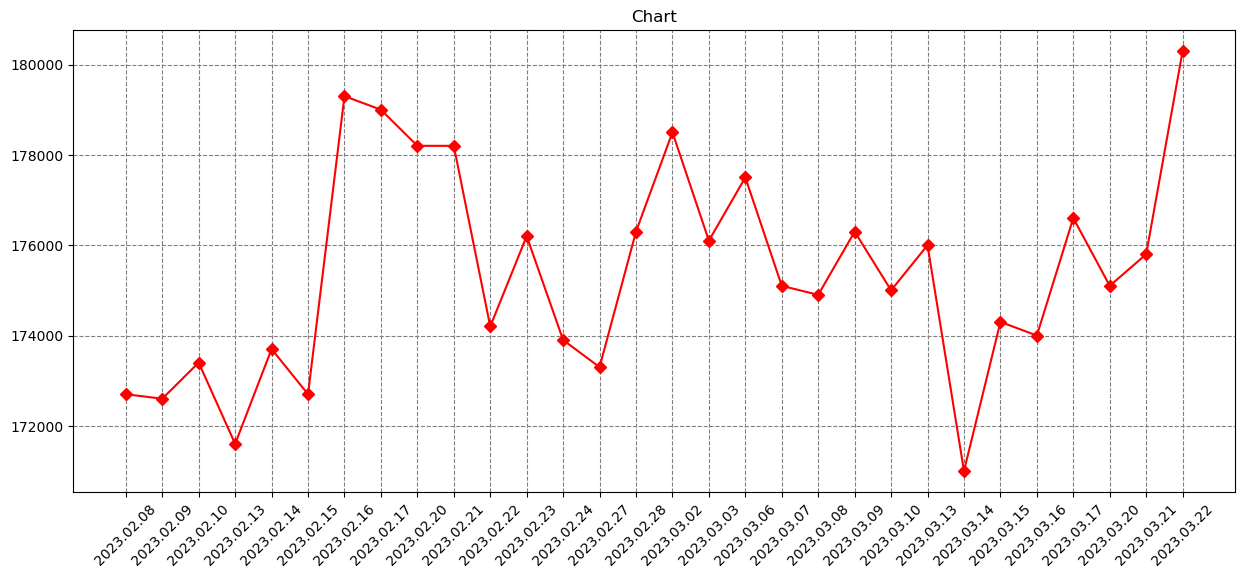

In [23]:
# 주식 정보 개인 비서

def stock_searching():
    try:
        print("검색하고 싶은 종목명을 검색하세요." + "\n")
        name = input()
        global s_code
        s_code = get_stock_code(name)
        print(f"\033[31m\033[91m{name}\033[0m의 종목코드는 \033[31m \033[93m{s_code}\033[0m입니다. \n")

        while True:
            print("알고 싶은 정보를 검색하세요." + "\n")
            print("#" * 85 + "\n")
            print("요약 | 뉴스 | 토론 | 연간 실적 | 분기 실적 | 주요 시세 | 공시 | 일별 시세 | 차트 | 종료" + "\n")
            print("#" * 85 + "\n")
            stock_search = input()
            if stock_search == "요약":
                stock_summary(name)
            elif stock_search == "뉴스":
                stock_news(name)
            elif stock_search == "토론":
                stock_event_discussion(name)
            elif stock_search == "연간 실적":
                stock_annual_fi(name)
            elif stock_search == "분기 실적":
                stock_quarter_fi(name)
            elif stock_search == "주요 시세":
                stock_major_price(name)
            elif stock_search == "공시":
                stock_public_an(name)
            elif stock_search == "일별 시세":
                stock_market_price(name)
            elif stock_search == "차트":
                stock_chart(name)
            elif stock_search == "종료":
                print("종료하겠습니다.")
                break
    except:
        print("없는 종목입니다. 다시 실행시켜주세요.")

stock_searching()
